# New York Airbnb Analytics

### Data Processing For Group Project

# Setup

In [410]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

#Suppress all warning
import warnings
warnings.filterwarnings("ignore")
# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


# Get the data

In [411]:
import pandas as pd
df1=pd.read_csv('http://data.insideairbnb.com/united-states/ny/new-york-city/2021-02-04/data/listings.csv.gz')

In [412]:
df1.head()

id                        listing_url       scrape_id last_scraped  \
0  2595  https://www.airbnb.com/rooms/2595  20210204180331   2021-02-05   
1  3831  https://www.airbnb.com/rooms/3831  20210204180331   2021-02-05   
2  5121  https://www.airbnb.com/rooms/5121  20210204180331   2021-02-05   
3  5178  https://www.airbnb.com/rooms/5178  20210204180331   2021-02-05   
4  5203  https://www.airbnb.com/rooms/5203  20210204180331   2021-02-06   

                                                name  \
0                              Skylit Midtown Castle   
1  Whole flr w/private bdrm, bath & kitchen(pls r...   
2                                    BlissArtsSpace!   
3                   Large Furnished Room Near B'way　   
4                 Cozy Clean Guest Room - Family Apt   

                                         description  \
0  Beautiful, spacious skylit studio in the heart...   
1  Enjoy 500 s.f. top floor in 1899 brownstone, w...   
2  <b>The space</b><br />HELLO EVERYONE AND THANK...   
3  Please don’t expect the luxury here just a bas...   
4  Our best guests are seeking a safe, clean, spa...   

                               neighborhood_overview  \
0  Centrally located in the heart of Manhattan ju...   
1  Just the right mix of urban center and local n...   
2                                                NaN   
3    Theater district, many restaurants around here.   
4  Our neighborhood is full of restaurants and ca...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/f0813a11-40b2...     2845   
1  https://a0.muscache.com/pictures/e49999c2-9fd5...     4869   
2  https://a0.muscache.com/pictures/2090980c-b68e...     7356   
3  https://a0.muscache.com/pictures/12065/f070997...     8967   
4  https://a0.muscache.com/pictures/103776/b37157...     7490   

                                 host_url  ... review_scores_communication  \
0  https://www.airbnb.com/users/show/2845  ...                        10.0   
1  https://www.airbnb.com/users/show/4869  ...                        10.0   
2  https://www.airbnb.com/users/show/7356  ...                        10.0   
3  https://www.airbnb.com/users/show/8967  ...                         9.0   
4  https://www.airbnb.com/users/show/7490  ...                        10.0   

  review_scores_location review_scores_value license instant_bookable  \
0                   10.0                 9.0     NaN                f   
1                   10.0                10.0     NaN                f   
2                    9.0                 9.0     NaN                f   
3                   10.0                 9.0     NaN                f   
4                   10.0                10.0     NaN                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              2                                           2   
1                              1                                           1   
2                              1                                           0   
3                              1                                           0   
4                              1                                           0   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            1   
3                                            1   
4                                            1   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.35  
1                                           0              4.99  
2                                           0              0.35  
3                                           0              3.31  
4                                           0              0.85  

[5 rows x 74 columns]

- Pick the valuable columns (not the columns with unique value for each row)

In [413]:
df1.drop(df1.columns[np.r_[0:3,6:10,12,18:22,24,26,28,34,31,42:55,56,61:68,69:73]], axis=1, inplace=True)

In [414]:
df1.head()

last_scraped                                               name  \
0   2021-02-05                              Skylit Midtown Castle   
1   2021-02-05  Whole flr w/private bdrm, bath & kitchen(pls r...   
2   2021-02-05                                    BlissArtsSpace!   
3   2021-02-05                   Large Furnished Room Near B'way　   
4   2021-02-06                 Cozy Clean Guest Room - Family Apt   

                                         description    host_name  host_since  \
0  Beautiful, spacious skylit studio in the heart...     Jennifer  2008-09-09   
1  Enjoy 500 s.f. top floor in 1899 brownstone, w...  LisaRoxanne  2008-12-07   
2  <b>The space</b><br />HELLO EVERYONE AND THANK...        Garon  2009-02-03   
3  Please don’t expect the luxury here just a bas...     Shunichi  2009-03-03   
4  Our best guests are seeking a safe, clean, spa...    MaryEllen  2009-02-05   

                                          host_about  host_response_time  \
0  A New Yorker since 2000! My passion is creatin...  within a few hours   
1  Laid-back Native New Yorker (formerly bi-coast...  within a few hours   
2   I am an artist(painter, filmmaker) and curato...                 NaN   
3  I used to work for a financial industry but no...        within a day   
4  Welcome to family life with my oldest two away...                 NaN   

  host_response_rate host_acceptance_rate host_is_superhost  ...    price  \
0                93%                  26%                 f  ...  $100.00   
1                98%                  93%                 f  ...   $73.00   
2                NaN                  NaN                 f  ...   $60.00   
3               100%                 100%                 f  ...   $79.00   
4                NaN                  NaN                 f  ...   $75.00   

  minimum_nights maximum_nights number_of_reviews  number_of_reviews_l30d  \
0             30           1125                48                       0   
1              1            730               386                       3   
2             30            730                50                       0   
3              2             14               474                       0   
4              2             14               118                       0   

   first_review last_review  review_scores_rating instant_bookable  \
0    2009-11-21  2019-11-04                  94.0                f   
1    2014-09-30  2021-01-27                  90.0                f   
2    2009-05-28  2019-12-02                  90.0                f   
3    2009-05-06  2020-09-25                  84.0                f   
4    2009-09-07  2017-07-21                  98.0                f   

   reviews_per_month  
0               0.35  
1               4.99  
2               0.35  
3               3.31  
4               0.85  

[5 rows x 32 columns]

In [415]:
corr_matrix=df1.corr()
corr_matrix["review_scores_rating"].sort_values(ascending=False)

review_scores_rating         1.000000
number_of_reviews            0.054595
reviews_per_month            0.041548
bedrooms                     0.010334
number_of_reviews_l30d       0.005152
accommodates                -0.006905
beds                        -0.011301
maximum_nights              -0.013451
longitude                   -0.015705
minimum_nights              -0.025785
latitude                    -0.031618
host_total_listings_count   -0.032321
Name: review_scores_rating, dtype: float64

### 2. Clean/ Processing the dataset

In [416]:
#=======================================================Data Cleansing===================================================
#Only pick the Airbnb apartment with reviews
df1=df1[df1['number_of_reviews'].astype(int)>0]
#Only pick the Airbnb apartment with price
df1=df1[df1['price'].apply(lambda x: len(x)>0)]
#Only pick the Airbnb with the answer(t/f) for "host_is_superhost"
df1=df1[df1['host_is_superhost'].apply(lambda x: len(str(x))==1)]
#Drop other answer except f/t in "instant_bookable"
df1=df1[df1['instant_bookable'].isin(['f','t'])]
#To drop the review score which lower than 21 (potential outliers)
df1=df1[df1['review_scores_rating']>21]
#Replace all the blank cell with NaN value
df1=df1.replace('',np.NaN)
#========================================================Add new features===============================================
#Get the length of the sentence in following five columns (number of words)
df1['name_length']  = df1['name'].apply(lambda x: len(str(x).split()))
df1['description_length']=df1['description'].apply(lambda x: len(str(x).split()))
df1['host_about_length']=df1['host_about'].apply(lambda x: len(str(x).split()))
df1['verifications_length']=df1['host_verifications'].apply(lambda x: len(str(x).split(',')))
df1['amenities_length']=df1['amenities'].apply(lambda x: len(str(x).split(',')))
#Get the difference between the "last_scraped" with the following dates (in days)
df1['host_since_days'] = (pd.to_datetime(df1['last_scraped'])-pd.to_datetime(df1['host_since'])).dt.days
df1['first_reviews_days'] = (pd.to_datetime(df1['last_scraped'])-pd.to_datetime(df1['first_review'])).dt.days
df1['last_review_days'] = (pd.to_datetime(df1['last_scraped'])-pd.to_datetime(df1['last_review'])).dt.days

#Convert price column to the float datatype
df1['price'] = df1['price'].str.replace(',', '').str.replace('$', '').astype(float)
#Get the new column to express the price per accommodate
df1['price_per_accommodates']=df1['price']/df1['accommodates'].astype(float)
#=====================================================Change the data type=============================================
#Convert the categorical columns to dummified columns
list_col=['host_is_superhost','host_identity_verified','instant_bookable']
for i in list_col:
    df1[i] = np.where(df1[i]== 't', 1, 0)

In [417]:
#Add the dummified column by extract the word from "amenities" column
df1['has_Hair_dryer']=np.where(df1['amenities'].str.contains('Hair dryer'), 1, 0)
#df[df['date'].astype(str).str.contains('07311954')]


- Apply impute package to fill the missing data in numerical columns

In [418]:
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(strategy="median")

In [419]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26633 entries, 0 to 36915
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   last_scraped               26633 non-null  object 
 1   name                       26628 non-null  object 
 2   description                26174 non-null  object 
 3   host_name                  26633 non-null  object 
 4   host_since                 26633 non-null  object 
 5   host_about                 17074 non-null  object 
 6   host_response_time         13574 non-null  object 
 7   host_response_rate         13574 non-null  object 
 8   host_acceptance_rate       17229 non-null  object 
 9   host_is_superhost          26633 non-null  int32  
 10  host_total_listings_count  26633 non-null  float64
 11  host_verifications         26633 non-null  object 
 12  host_identity_verified     26633 non-null  int32  
 13  neighbourhood_cleansed     26633 non-null  obj

In [420]:
df1.shape

(26633, 42)

- Remove the text attribute because median can only be calculated on numerical attributes:

## EUNICE Edit - Starts Here - IMPUTATION

### I have not deleted anything - I just commented out codes that I think we should delete

In [421]:
#sample_incomplete_rows = df_num[df_num.isnull().any(axis=1)].head()

In [422]:
#imputer.fit(df_num)

In [423]:
#imputer.statistics_

In [424]:
#df_num.median().values

In [425]:
#X = imputer.transform(df_num)
#df_tr = pd.DataFrame(X, columns=df_num.columns,
#                          index=df1.index)
#df_tr.loc[sample_incomplete_rows.index.values]

### Check for missing values

In [426]:
#imputer.strategy
#df_tr = pd.DataFrame(X, columns=df_num.columns, index=df_num.index)
#df_tr.head()

In [427]:
def missing_values(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns={
        0: 'Missing Values',
        1: '% of Total Values'
    })
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
    print("Dataframe has " + str(df.shape[1]) + " columns.")
    print("There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    return mis_val_table_ren_columns

# Missing values statistics
miss_values = missing_values(df1)
miss_values.head(20)

Dataframe has 42 columns.
There are 9 columns that have missing values.


Missing Values  % of Total Values
host_response_time             13059               49.0
host_response_rate             13059               49.0
host_about                      9559               35.9
host_acceptance_rate            9404               35.3
bedrooms                        2522                9.5
description                      459                1.7
beds                             130                0.5
bathrooms_text                    39                0.1
name                               5                0.0

### Flag Missing Values

**Create a new column called 'Flag' which is 1 if a row is complete with all its values, and 0 if there is a missing value in the row**

In [428]:
df1['flag'] = df1.notna().all(axis=1).view('i1')

In [429]:
df1

last_scraped                                               name  \
0       2021-02-05                              Skylit Midtown Castle   
1       2021-02-05  Whole flr w/private bdrm, bath & kitchen(pls r...   
2       2021-02-05                                    BlissArtsSpace!   
3       2021-02-05                   Large Furnished Room Near B'way　   
4       2021-02-06                 Cozy Clean Guest Room - Family Apt   
...            ...                                                ...   
36818   2021-02-06                       lanigirO    JFK•Casino•Beach   
36832   2021-02-05                Beautiful Room at Central Park West   
36848   2021-02-05            Big Blue Room & confortable in Brooklyn   
36851   2021-02-05                   Cozy room in heart of Brooklyn💓😌   
36915   2021-02-06  Peaceful & luxurious apt. in the heart of Astoria   

                                             description           host_name  \
0      Beautiful, spacious skylit studio in the heart...            Jennifer   
1      Enjoy 500 s.f. top floor in 1899 brownstone, w...         LisaRoxanne   
2      <b>The space</b><br />HELLO EVERYONE AND THANK...               Garon   
3      Please don’t expect the luxury here just a bas...            Shunichi   
4      Our best guests are seeking a safe, clean, spa...           MaryEllen   
...                                                  ...                 ...   
36818  This is an entire compact basement studio to y...                Ryan   
36832                                                NaN               Deniz   
36848  It is a beautiful private room, the bathroom i...  Cristina And Sasha   
36851                                                NaN           Valentina   
36915  Peaceful and Luxurious apartment in the heart ...            Giovanni   

       host_since                                         host_about  \
0      2008-09-09  A New Yorker since 2000! My passion is creatin...   
1      2008-12-07  Laid-back Native New Yorker (formerly bi-coast...   
2      2009-02-03   I am an artist(painter, filmmaker) and curato...   
3      2009-03-03  I used to work for a financial industry but no...   
4      2009-02-05  Welcome to family life with my oldest two away...   
...           ...                                                ...   
36818  2017-06-03                                                NaN   
36832  2015-08-03  I am Deniz 34 years old student pilot in New Y...   
36848  2016-11-15  Sasha is from Omaha originally but has lived i...   
36851  2019-10-07                                                NaN   
36915  2017-11-07                                                NaN   

       host_response_time host_response_rate host_acceptance_rate  \
0      within a few hours                93%                  26%   
1      within a few hours                98%                  93%   
2                     NaN                NaN                  NaN   
3            within a day               100%                 100%   
4                     NaN                NaN                  NaN   
...                   ...                ...                  ...   
36818      within an hour               100%                  98%   
36832      within an hour               100%                 100%   
36848      within an hour               100%                  98%   
36851  within a few hours                91%                 100%   
36915      within an hour               100%                 100%   

       host_is_superhost  ...  description_length host_about_length  \
0                      0  ...                 151                67   
1                      0  ...                 165                35   
2                      0  ...                 175                69   
3                      0  ...                 165                21   
4                      0  ...                 171               140   
...                  ...  ...                 ..

In [430]:
sum(df1.flag)

7831

There are 7831 rows with at least 1 missing value

**Another flagging method: flag the missing rows in each column separately**

In [432]:
cols = ['host_response_time','host_response_rate','host_acceptance_rate','bedrooms','description','beds','bathrooms_text','name']
df_try = df1[cols].isnull().astype(int).add_suffix('_indicator')
#df_try

#merge both the df1 and the flagged columns
df2 = pd.merge(df1, df_try, left_index=True, right_index=True)
df2.head(10)

last_scraped                                               name  \
0    2021-02-05                              Skylit Midtown Castle   
1    2021-02-05  Whole flr w/private bdrm, bath & kitchen(pls r...   
2    2021-02-05                                    BlissArtsSpace!   
3    2021-02-05                   Large Furnished Room Near B'way　   
4    2021-02-06                 Cozy Clean Guest Room - Family Apt   
5    2021-02-05     Lovely Room 1, Garden, Best Area, Legal rental   
6    2021-02-05                   Only 2 stops to Manhattan studio   
8    2021-02-06                            UES Beautiful Blue Room   
9    2021-02-05        Perfect for Your Parents:  Privacy + Garden   
11   2021-02-06                   Sweet and Spacious Brooklyn Loft   

                                          description      host_name  \
0   Beautiful, spacious skylit studio in the heart...       Jennifer   
1   Enjoy 500 s.f. top floor in 1899 brownstone, w...    LisaRoxanne   
2   <b>The space</b><br />HELLO EVERYONE AND THANK...          Garon   
3   Please don’t expect the luxury here just a bas...       Shunichi   
4   Our best guests are seeking a safe, clean, spa...      MaryEllen   
5   Discounted now!   Beautiful house, gorgeous ga...         Laurie   
6   Comfortable studio apartment with super comfor...  Allen & Irina   
8   Beautiful peaceful healthy home<br /><br /><b>...            Cyn   
9   Parents/grandparents coming to town, or are yo...           Jane   
11  A true open-plan loft in a repurposed factory ...          Chaya   

    host_since                                         host_about  \
0   2008-09-09  A New Yorker since 2000! My passion is creatin...   
1   2008-12-07  Laid-back Native New Yorker (formerly bi-coast...   
2   2009-02-03   I am an artist(painter, filmmaker) and curato...   
3   2009-03-03  I used to work for a financial industry but no...   
4   2009-02-05  Welcome to family life with my oldest two away...   
5   2009-03-10  Hello, \r\nI will be welcoming and helpful,  w...   
6   2009-05-06  We love to travel. When we travel we like to s...   
8   2009-05-12  Capturing the Steinbeck side of life in its Fi...   
9   2009-05-17  I have been an Airbnb host since 2009 -- just ...   
11  2009-06-12  We're a couple in our thirties who love to tra...   

    host_response_time host_response_rate host_acceptance_rate  \
0   within a few hours                93%                  26%   
1   within a few hours                98%                  93%   
2                  NaN                NaN                  NaN   
3         within a day               100%                 100%   
4                  NaN                NaN                  NaN   
5       within an hour               100%                 100%   
6                  NaN                NaN                  75%   
8       within an hour               100%                 100%   
9       within an hour               100%                 100%   
11      within an hour               100%                  62%   

    host_is_superhost  ...  has_Hair_dryer flag  host_response_time_indicator  \
0                   0  ...               1    0                             0   
1                   0  ...               1    1                             0   
2                   0  ...               0    0                             1   
3                   0  ...               1    1                             0   
4                   0  ...               1    0                             1   
5                   1  ...               1    1                             0   
6                   0  ...               1    0                             1   
8                   0  ...               1    1                             0   
9                   1  ...               1    1                             0   
11                  0  ...               0    0                             0   

   host_response_rate_indicator  host_acceptance_rate_indica

In [389]:
#Drop the rows with NaN value for all categorical columns
#df1=df1.dropna()

**Convert 'host_acceptance_rate' and 'host_response_rate' to numerical variables by removing the %'**

In [437]:
#get all the non-null values and Convert the object datatype to numerical datatype: host_response_rate, host_acceptance_rate
test = df2[['host_response_rate','host_acceptance_rate']].dropna()
test['host_acceptance_rate'] =test['host_acceptance_rate'].str.replace('%',"").astype(int)/100
test['host_response_rate'] =test['host_response_rate'].str.replace('%',"").astype(int)/100
test

host_response_rate  host_acceptance_rate
0                    0.93                  0.26
1                    0.98                  0.93
3                    1.00                  1.00
5                    1.00                  1.00
8                    1.00                  1.00
...                   ...                   ...
36818                1.00                  0.98
36832                1.00                  1.00
36848                1.00                  0.98
36851                0.91                  1.00
36915                1.00                  1.00

[13146 rows x 2 columns]

In [438]:
#Add the numeric values back into the dataframe (replacement)
df2['host_response_rate'].loc[test.index] = test['host_response_rate']
df2['host_acceptance_rate'].loc[test.index] = test['host_acceptance_rate']
df2

last_scraped                                               name  \
0       2021-02-05                              Skylit Midtown Castle   
1       2021-02-05  Whole flr w/private bdrm, bath & kitchen(pls r...   
2       2021-02-05                                    BlissArtsSpace!   
3       2021-02-05                   Large Furnished Room Near B'way　   
4       2021-02-06                 Cozy Clean Guest Room - Family Apt   
...            ...                                                ...   
36818   2021-02-06                       lanigirO    JFK•Casino•Beach   
36832   2021-02-05                Beautiful Room at Central Park West   
36848   2021-02-05            Big Blue Room & confortable in Brooklyn   
36851   2021-02-05                   Cozy room in heart of Brooklyn💓😌   
36915   2021-02-06  Peaceful & luxurious apt. in the heart of Astoria   

                                             description           host_name  \
0      Beautiful, spacious skylit studio in the heart...            Jennifer   
1      Enjoy 500 s.f. top floor in 1899 brownstone, w...         LisaRoxanne   
2      <b>The space</b><br />HELLO EVERYONE AND THANK...               Garon   
3      Please don’t expect the luxury here just a bas...            Shunichi   
4      Our best guests are seeking a safe, clean, spa...           MaryEllen   
...                                                  ...                 ...   
36818  This is an entire compact basement studio to y...                Ryan   
36832                                                NaN               Deniz   
36848  It is a beautiful private room, the bathroom i...  Cristina And Sasha   
36851                                                NaN           Valentina   
36915  Peaceful and Luxurious apartment in the heart ...            Giovanni   

       host_since                                         host_about  \
0      2008-09-09  A New Yorker since 2000! My passion is creatin...   
1      2008-12-07  Laid-back Native New Yorker (formerly bi-coast...   
2      2009-02-03   I am an artist(painter, filmmaker) and curato...   
3      2009-03-03  I used to work for a financial industry but no...   
4      2009-02-05  Welcome to family life with my oldest two away...   
...           ...                                                ...   
36818  2017-06-03                                                NaN   
36832  2015-08-03  I am Deniz 34 years old student pilot in New Y...   
36848  2016-11-15  Sasha is from Omaha originally but has lived i...   
36851  2019-10-07                                                NaN   
36915  2017-11-07                                                NaN   

       host_response_time host_response_rate host_acceptance_rate  \
0      within a few hours               0.93                 0.26   
1      within a few hours               0.98                 0.93   
2                     NaN                NaN                  NaN   
3            within a day                  1                    1   
4                     NaN                NaN                  NaN   
...                   ...                ...                  ...   
36818      within an hour                  1                 0.98   
36832      within an hour                  1                    1   
36848      within an hour                  1                 0.98   
36851  within a few hours               0.91                    1   
36915      within an hour                  1                    1   

       host_is_superhost  ...  has_Hair_dryer flag  \
0                      0  ...               1    0   
1                      0  ...               1    1   
2                      0  ...               0    0   
3                      0  ...               1    1   
4                      0  ...               1    0   
...                  ...  ...             ...  ...   
36818                  1  ...               0    0   
36832                  0  ...             

last_scraped                                               name  \
0       2021-02-05                              Skylit Midtown Castle   
1       2021-02-05  Whole flr w/private bdrm, bath & kitchen(pls r...   
2       2021-02-05                                    BlissArtsSpace!   
3       2021-02-05                   Large Furnished Room Near B'way　   
4       2021-02-06                 Cozy Clean Guest Room - Family Apt   
...            ...                                                ...   
36818   2021-02-06                       lanigirO    JFK•Casino•Beach   
36832   2021-02-05                Beautiful Room at Central Park West   
36848   2021-02-05            Big Blue Room & confortable in Brooklyn   
36851   2021-02-05                   Cozy room in heart of Brooklyn💓😌   
36915   2021-02-06  Peaceful & luxurious apt. in the heart of Astoria   

                                             description           host_name  \
0      Beautiful, spacious skylit studio in the heart...            Jennifer   
1      Enjoy 500 s.f. top floor in 1899 brownstone, w...         LisaRoxanne   
2      <b>The space</b><br />HELLO EVERYONE AND THANK...               Garon   
3      Please don’t expect the luxury here just a bas...            Shunichi   
4      Our best guests are seeking a safe, clean, spa...           MaryEllen   
...                                                  ...                 ...   
36818  This is an entire compact basement studio to y...                Ryan   
36832                                                NaN               Deniz   
36848  It is a beautiful private room, the bathroom i...  Cristina And Sasha   
36851                                                NaN           Valentina   
36915  Peaceful and Luxurious apartment in the heart ...            Giovanni   

       host_since                                         host_about  \
0      2008-09-09  A New Yorker since 2000! My passion is creatin...   
1      2008-12-07  Laid-back Native New Yorker (formerly bi-coast...   
2      2009-02-03   I am an artist(painter, filmmaker) and curato...   
3      2009-03-03  I used to work for a financial industry but no...   
4      2009-02-05  Welcome to family life with my oldest two away...   
...           ...                                                ...   
36818  2017-06-03                                                NaN   
36832  2015-08-03  I am Deniz 34 years old student pilot in New Y...   
36848  2016-11-15  Sasha is from Omaha originally but has lived i...   
36851  2019-10-07                                                NaN   
36915  2017-11-07                                                NaN   

       host_response_time host_response_rate host_acceptance_rate  \
0      within a few hours               0.93                 0.26   
1      within a few hours               0.98                 0.93   
2                     NaN                NaN                  NaN   
3            within a day                  1                    1   
4                     NaN                NaN                  NaN   
...                   ...                ...                  ...   
36818      within an hour                  1                 0.98   
36832      within an hour                  1                    1   
36848      within an hour                  1                 0.98   
36851  within a few hours               0.91                    1   
36915      within an hour                  1                    1   

       host_is_superhost  ...  has_Hair_dryer flag  \
0                      0  ...               1    0   
1                      0  ...               1    1   
2                      0  ...               0    0   
3                      0  ...               1    1   
4                      0  ...               1    0   
...                  ...  ...             ...  ...   
36818                  1  ...               0    0   
36832                  0  ...             

### Iterative imputer on numerical variables

In [439]:
#for some reason, the added values become 'objects', so you need to convert them to 'floats'
df2['host_response_rate'] = pd.to_numeric(df2['host_response_rate'],errors = 'coerce')
df2['host_acceptance_rate'] = pd.to_numeric(df2['host_acceptance_rate'],errors = 'coerce')

In [440]:
df_num=df2.iloc[:,np.r_[7:11,12,14:16,17,19:21,22:27,29:42]]

In [441]:
# Missing values statistics
miss_values = missing_values(df_num)
miss_values.head(20)

Dataframe has 28 columns.
There are 4 columns that have missing values.


Missing Values  % of Total Values
host_response_rate             13487               50.6
host_acceptance_rate           13487               50.6
bedrooms                        2522                9.5
beds                             130                0.5

In [442]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(random_state=0)

df_num1 = imp.fit_transform(df_num)

cols = list(df_num)

df_num1=pd.DataFrame(df_num1)
df_num1.columns=cols
df_num1

host_response_rate  host_acceptance_rate  host_is_superhost  \
0                0.930000              0.260000                0.0   
1                0.980000              0.930000                0.0   
2                0.922288              0.575276                0.0   
3                1.000000              1.000000                0.0   
4                0.880550              0.498145                0.0   
...                   ...                   ...                ...   
26628            1.000000              0.980000                1.0   
26629            1.000000              1.000000                0.0   
26630            1.000000              0.980000                0.0   
26631            0.910000              1.000000                0.0   
26632            1.000000              1.000000                0.0   

       host_total_listings_count  host_identity_verified  latitude  longitude  \
0                            6.0                     1.0  40.75362  -73.98377   
1                            1.0                     1.0  40.68514  -73.95976   
2                            1.0                     1.0  40.68688  -73.95596   
3                            1.0                     0.0  40.76468  -73.98315   
4                            1.0                     1.0  40.80178  -73.96723   
...                          ...                     ...       ...        ...   
26628                        3.0                     1.0  40.67319  -73.84068   
26629                        4.0                     1.0  40.79851  -73.96004   
26630                        4.0                     1.0  40.70146  -73.94368   
26631                        1.0                     1.0  40.70430  -73.92561   
26632                        1.0                     1.0  40.76801  -73.91197   

       accommodates  bedrooms  beds  ...  name_length  description_length  \
0               2.0  1.048801   1.0  ...          3.0               151.0   
1               3.0  1.000000   3.0  ...          8.0               165.0   
2               2.0  1.000000   1.0  ...          1.0               175.0   
3               2.0  1.000000   1.0  ...          5.0               165.0   
4               1.0  1.000000   1.0  ...          7.0               171.0   
...             ...       ...   ...  ...          ...                 ...   
26628           2.0  1.000000   1.0  ...          2.0               168.0   
26629           1.0  4.000000   5.0  ...          6.0                 1.0   
26630           2.0  1.000000   1.0  ...          7.0               146.0   
26631           2.0  1.000000   1.0  ...          6.0                 1.0   
26632           3.0  1.000000   1.0  ...          9.0                72.0   

       host_about_length  verifications_length  amenities_length  \
0                   67.0                   9.0              31.0   
1                   35.0                   6.0              35.0   
2                   69.0                   8.0               5.0   
3                   21.0                   4.0              18.0   
4                  140.0                   7.0              16.0   
...                  ...                   ...               ...   
26628                1.0                  10.0              16.0   
26629               23.0                   5.0              20.0   
26630              221.0                   7.0              28.0   
26631                1.0                   6.0              20.0   
26632                1.0                   4.0              19.0   

       host_since_days  first_reviews_days  last_review_days  \
0               4532.0              4094.0             459.0   
1               4443.0              2320.0               9.0   
2               4385.0              4271.0             431.0   
3               4357.0              4293.0             133.0   
4               4384.0              4170.0            1296.0   
...                ...                 ...               ...   
266

In [443]:
# Re-check Missing values statistics
miss_values = missing_values(df_num1)
miss_values.head(20)

Dataframe has 28 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

**Now, replace the incomplete columns in df2 with the corresponding imputed columns from df_num1**

In [444]:
df2[cols] = df_num1[cols].values

df2.head(5)

last_scraped                                               name  \
0   2021-02-05                              Skylit Midtown Castle   
1   2021-02-05  Whole flr w/private bdrm, bath & kitchen(pls r...   
2   2021-02-05                                    BlissArtsSpace!   
3   2021-02-05                   Large Furnished Room Near B'way　   
4   2021-02-06                 Cozy Clean Guest Room - Family Apt   

                                         description    host_name  host_since  \
0  Beautiful, spacious skylit studio in the heart...     Jennifer  2008-09-09   
1  Enjoy 500 s.f. top floor in 1899 brownstone, w...  LisaRoxanne  2008-12-07   
2  <b>The space</b><br />HELLO EVERYONE AND THANK...        Garon  2009-02-03   
3  Please don’t expect the luxury here just a bas...     Shunichi  2009-03-03   
4  Our best guests are seeking a safe, clean, spa...    MaryEllen  2009-02-05   

                                          host_about  host_response_time  \
0  A New Yorker since 2000! My passion is creatin...  within a few hours   
1  Laid-back Native New Yorker (formerly bi-coast...  within a few hours   
2   I am an artist(painter, filmmaker) and curato...                 NaN   
3  I used to work for a financial industry but no...        within a day   
4  Welcome to family life with my oldest two away...                 NaN   

   host_response_rate  host_acceptance_rate  host_is_superhost  ...  \
0            0.930000              0.260000                0.0  ...   
1            0.980000              0.930000                0.0  ...   
2            0.922288              0.575276                0.0  ...   
3            1.000000              1.000000                0.0  ...   
4            0.880550              0.498145                0.0  ...   

   has_Hair_dryer flag  host_response_time_indicator  \
0             1.0    0                             0   
1             1.0    1                             0   
2             0.0    0                             1   
3             1.0    1                             0   
4             1.0    0                             1   

  host_response_rate_indicator  host_acceptance_rate_indicator  \
0                            0                               0   
1                            0                               0   
2                            1                               1   
3                            0                               0   
4                            1                               1   

   bedrooms_indicator description_indicator  beds_indicator  \
0                   1                     0               0   
1                   0                     0               0   
2                   0                     0               0   
3                   0                     0               0   
4                   0                     0               0   

  bathrooms_text_indicator  name_indicator  
0                        0               0  
1                        0               0  
2                        1               0  
3                        0               0  
4                        0               0  

[5 rows x 51 columns]

In [445]:
# Check Missing values statistics again
miss_values = missing_values(df2)
miss_values.head(20)

Dataframe has 51 columns.
There are 5 columns that have missing values.


Missing Values  % of Total Values
host_response_time           13059               49.0
host_about                    9559               35.9
description                    459                1.7
bathrooms_text                  39                0.1
name                             5                0.0

We have taken care of the numerical values, and need to work on the categorical values next...

# Eunice Edit - Ends here

**For the remaining categorical variables, I suggest we:
- host_response_time and bathrooms_text: impute with the most common value
- host_about, description and name: remove null rows

In [ ]:
df1 = df2.copy()

In [ ]:
df1.head()

last_scraped  ... has_Hair_dryer
1   2021-02-05  ...              1
3   2021-02-05  ...              1
5   2021-02-05  ...              1
8   2021-02-06  ...              1
9   2021-02-05  ...              1

[5 rows x 42 columns]

### 3. Get the general insight for Airbnb dataset

In [ ]:
#get the data type for each column of variable
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7831 entries, 1 to 36848
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   last_scraped               7831 non-null   object 
 1   name                       7831 non-null   object 
 2   description                7831 non-null   object 
 3   host_name                  7831 non-null   object 
 4   host_since                 7831 non-null   object 
 5   host_about                 7831 non-null   object 
 6   host_response_time         7831 non-null   object 
 7   host_response_rate         7831 non-null   float64
 8   host_acceptance_rate       7831 non-null   float64
 9   host_is_superhost          7831 non-null   int64  
 10  host_total_listings_count  7831 non-null   float64
 11  host_verifications         7831 non-null   object 
 12  host_identity_verified     7831 non-null   int64  
 13  neighbourhood_cleansed     7831 non-null   obje

In [ ]:
#Get the statistic value for each numerical columns
df1.describe()

host_response_rate  ...  has_Hair_dryer
count         7831.000000  ...     7831.000000
mean             0.918087  ...        0.807432
std              0.204328  ...        0.394342
min              0.000000  ...        0.000000
25%              0.960000  ...        1.000000
50%              1.000000  ...        1.000000
75%              1.000000  ...        1.000000
max              1.000000  ...        1.000000

[8 rows x 28 columns]

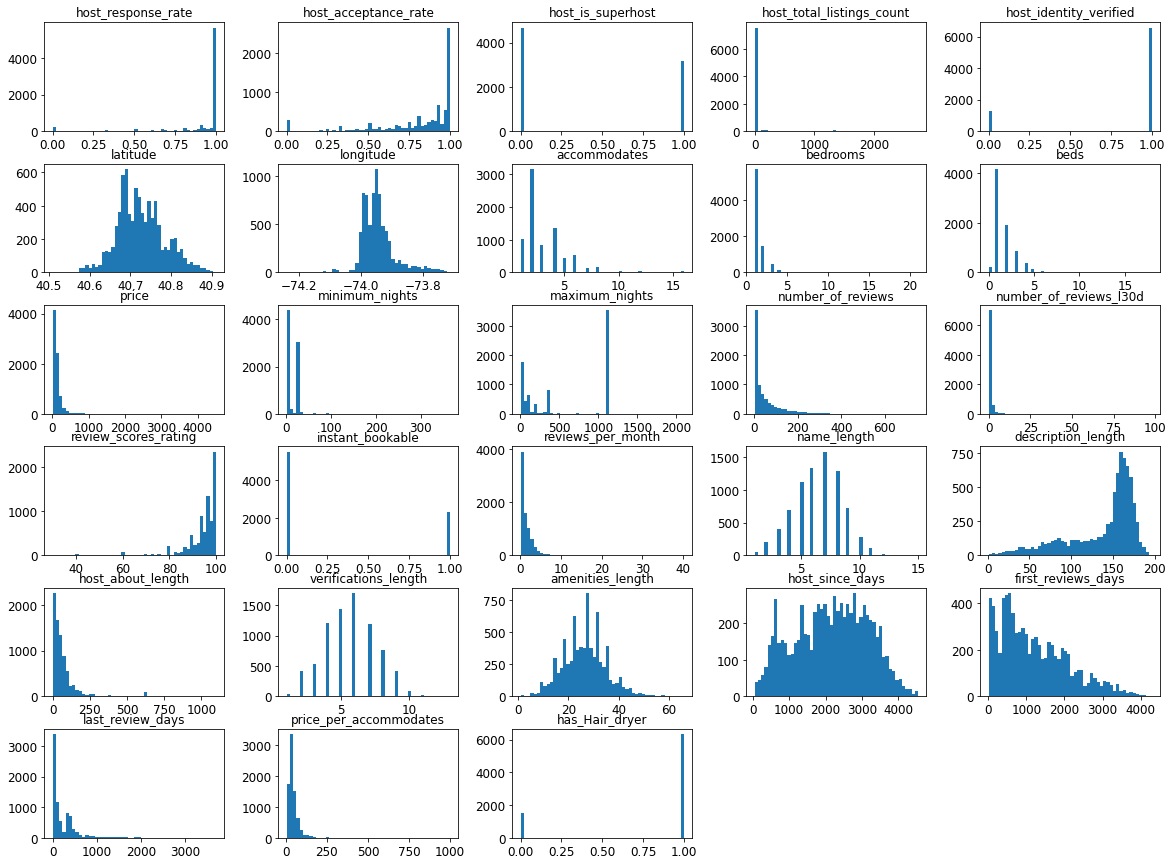

In [ ]:
# Get the numerical columns' distribution
import matplotlib.pyplot as plt
df1.hist(bins=50, figsize=(20,15),grid=False)
plt.savefig("attribute_histogram_plots.png")
plt.show()

NameError: ignored

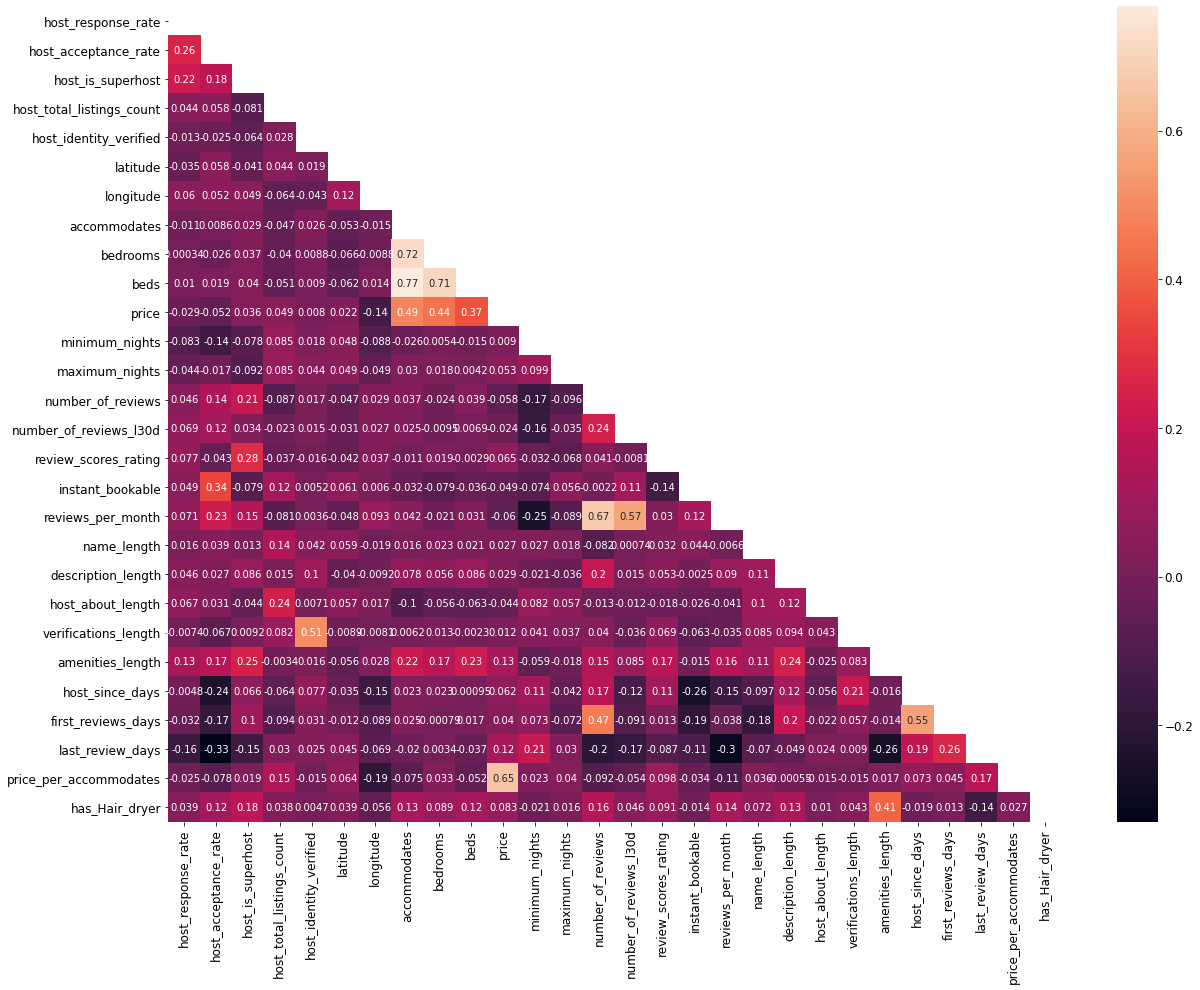

In [ ]:
#Plot the correlation plot among the numerical varaibles
import seaborn as sns
matrix = np.triu(df1.corr())
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df1.corr(), annot = True,mask=matrix)
save_fig("correlation_plot")
fig.show()

### 4. Split test and train sets

In [ ]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [ ]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
train_set,test_set=split_train_test(df1,0.2)
print("The length of train set is: ",len(train_set))
print("The length of test set is: ",len(test_set))

The length of train set is:  6265
The length of test set is:  1566


In [ ]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [ ]:
df1_with_id =df1.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(df1_with_id, 0.2, "index")

In [ ]:
test_set.head()

index last_scraped  ... price_per_accommodates has_Hair_dryer
2       5   2021-02-05  ...              41.500000              1
5      12   2021-02-05  ...              24.000000              1
7      16   2021-02-05  ...              23.333333              1
12     23   2021-02-05  ...              18.750000              0
13     25   2021-02-05  ...              40.500000              1

[5 rows x 43 columns]

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df1, test_size=0.2, random_state=42)

In [ ]:
test_set.head()

last_scraped  ... has_Hair_dryer
3171    2021-02-05  ...              0
20070   2021-02-05  ...              1
10877   2021-02-05  ...              1
5410    2021-02-05  ...              1
21701   2021-02-06  ...              0

[5 rows x 42 columns]

In [ ]:
df1["rating_cat"] = pd.cut(df1["review_scores_rating"],
                               bins=[19, 92, 96, 99, 101],
                               labels=[1, 2, 3, 4])

In [ ]:
df1["rating_cat"].value_counts()

2    2087
1    1967
3    1937
4    1840
Name: rating_cat, dtype: int64

- As shown below, Shuffle the dataset to avoid the bais batween the train and test sets by rearranging the order of items in a list randomly


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df1, df1["rating_cat"]):
    strat_train_set =df1.iloc[train_index,:]
    strat_test_set = df1.iloc[test_index,:]

In [ ]:
strat_train_set.head()

last_scraped  ... rating_cat
12882   2021-02-05  ...          2
20944   2021-02-05  ...          1
396     2021-02-06  ...          2
614     2021-02-05  ...          2
2516    2021-02-06  ...          1

[5 rows x 43 columns]

In [ ]:
strat_test_set.head()

last_scraped  ... rating_cat
21888   2021-02-06  ...          4
24686   2021-02-05  ...          3
23120   2021-02-06  ...          2
22501   2021-02-05  ...          4
17403   2021-02-05  ...          1

[5 rows x 43 columns]

# Discover and visualize the data to gain insights

### 1. Draw the word cloud for text variables

The word cloud for "description", <br>
which can help us to get the most popular words for hosts to describe thier Airbnb apartments.

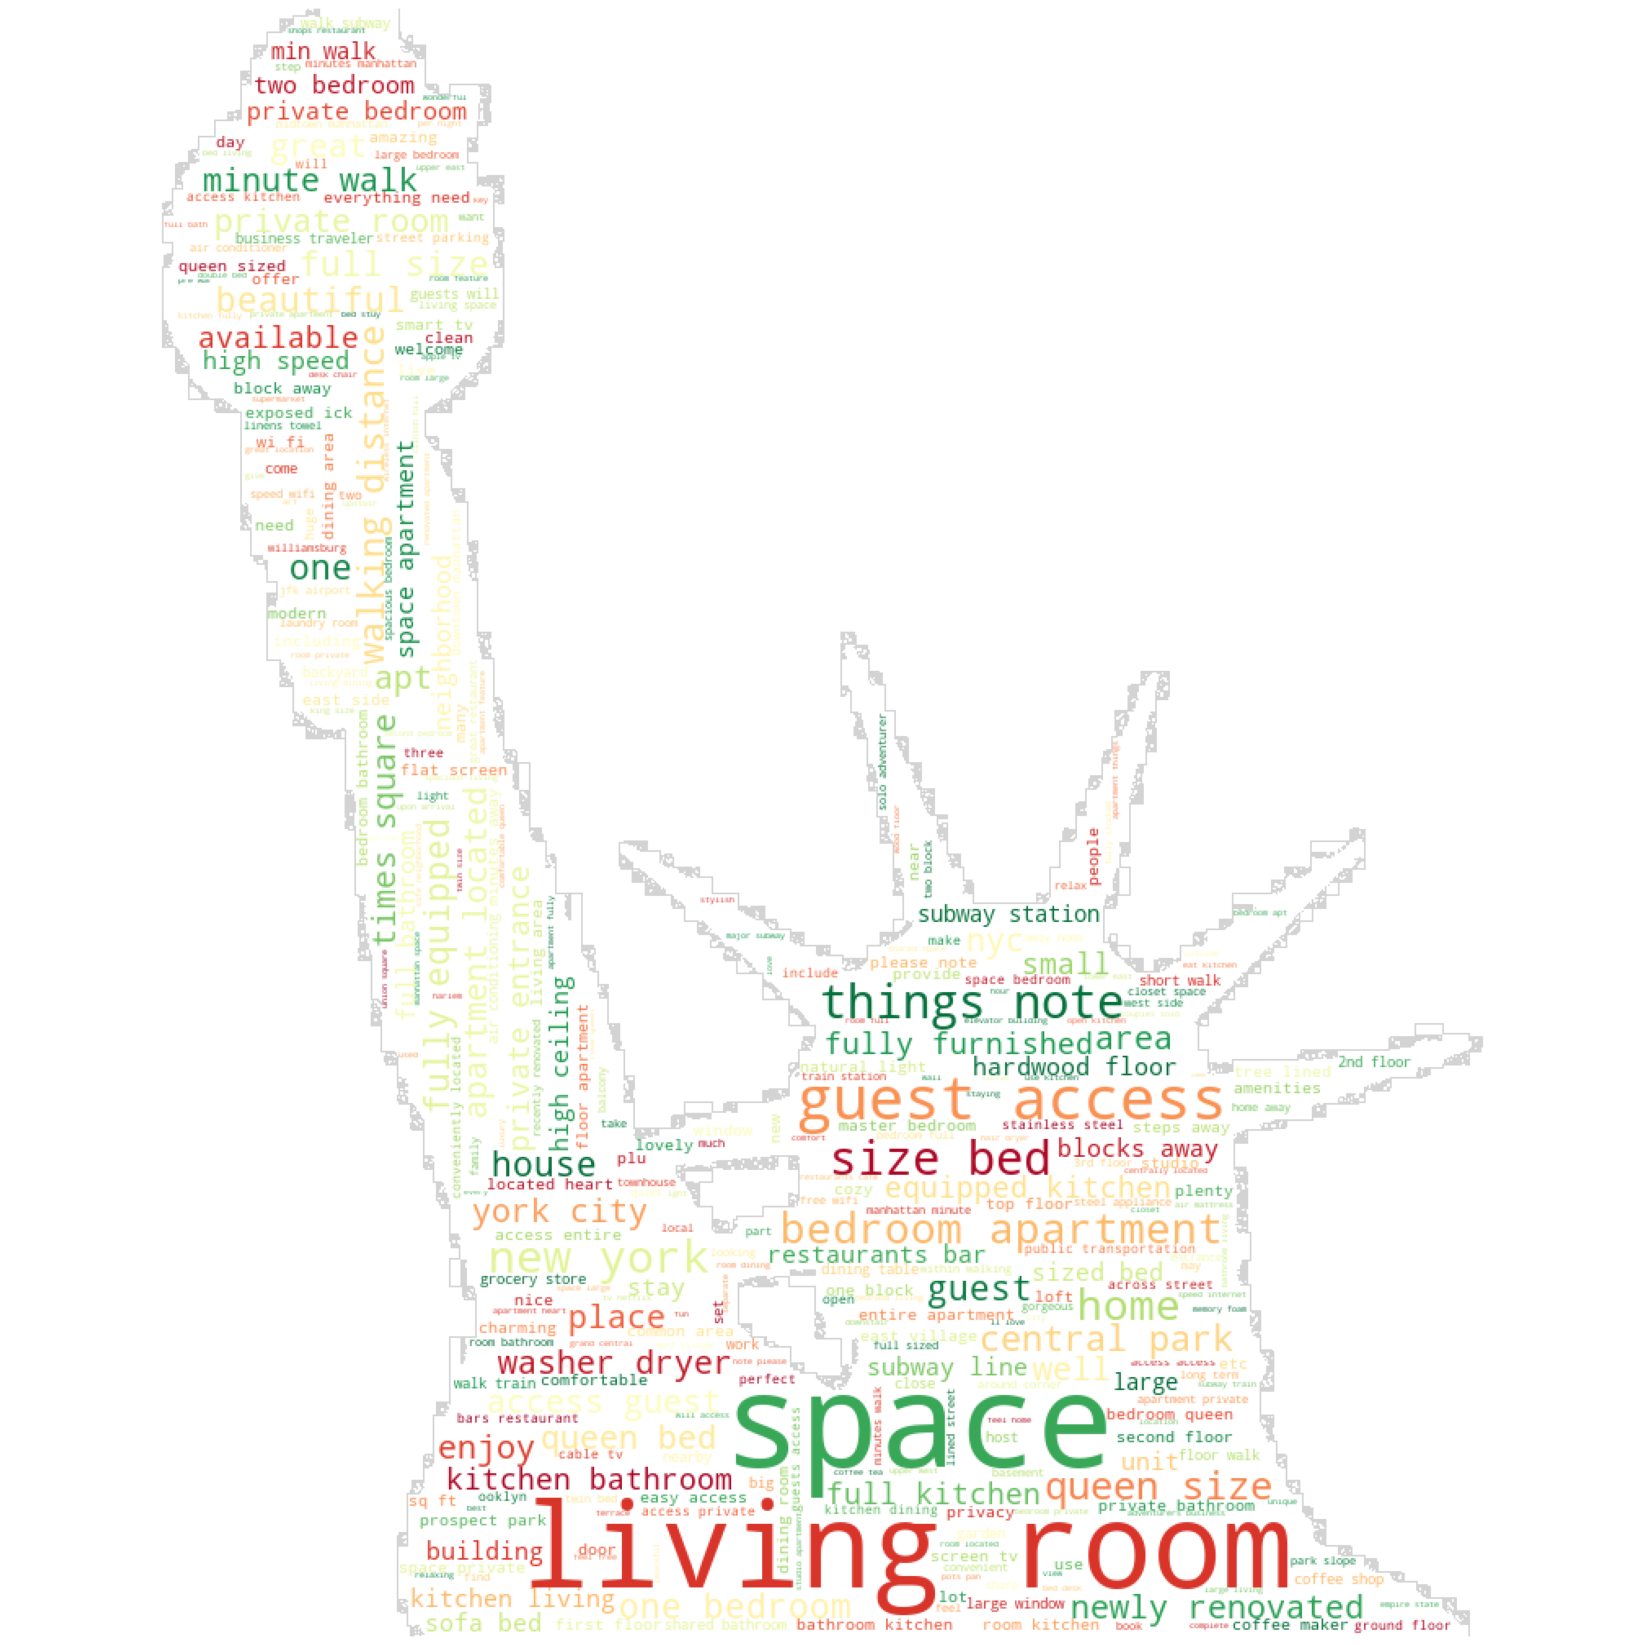

In [70]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator, get_single_color_func
from PIL import Image
comment_words = ' '
STOPWORDS.update(['/><br','br','&'])
stopwords = set(STOPWORDS)


sentences=''
for val in df1['description']: 

   # typecaste each val to string 
    val = str(val)
    sentences=val+sentences
   # split the value 
tokens=sentences.split()

# Converts each token into lowercase 
token=[element.lower() for element in tokens]

# for words in token: 
comment_words=" ".join(str(item) for item in token)
comment_words=comment_words.replace("br", "").replace('access to','access')\
.replace('you will','').replace('the apartment','apartment').replace('apartment is','apartment')
mask = np.array(Image.open("liberty_statue.jpg"))


wordcloud = WordCloud(width = 800, height =900 , 
            stopwords = stopwords, 
            max_words=800,
            background_color="white",
            colormap='RdYlGn',
            mask=mask,
            min_font_size = 5,                      
            collocations=True,
            contour_color='lightgrey',
            contour_width=1).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (50, 30)) 
plt.imshow(wordcloud) 

plt.axis("off") 
#plt.tight_layout(pad = 0) 
plt.savefig("wordcloud_desription.jpg")
plt.show()




The word cloud for "host_about", <br>
which can help us to get the most popular words for hosts to introduce themselves

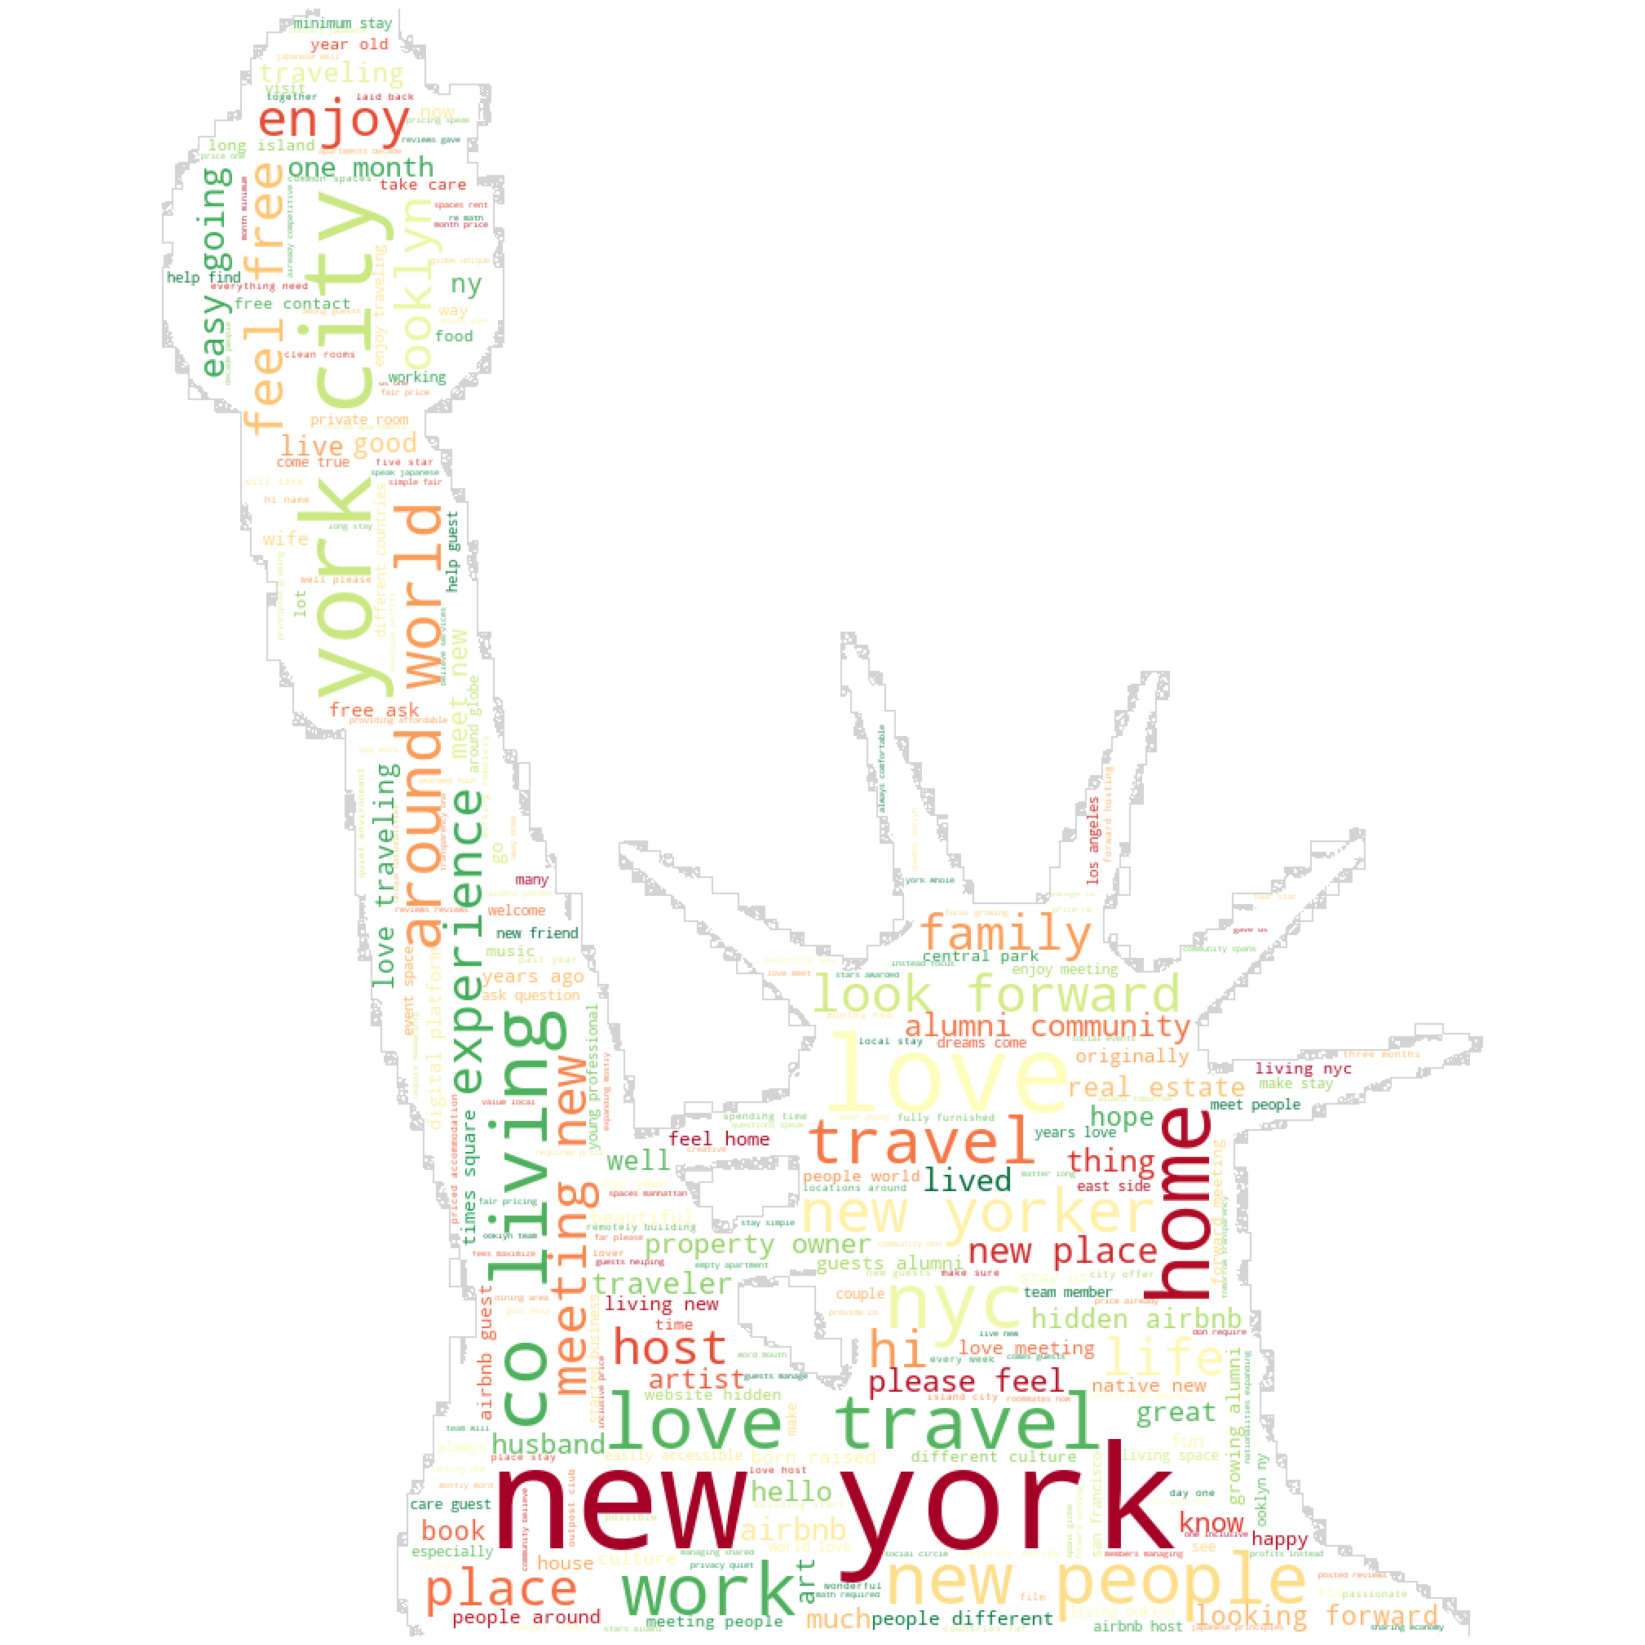

In [74]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator, get_single_color_func
from PIL import Image
comment_words = ' '
STOPWORDS.update(['/><br','br','&'])
stopwords = set(STOPWORDS)


sentences=''
for val in df1['host_about']: 

   # typecaste each val to string 
    val = str(val)
    sentences=val+sentences
   # split the value 
tokens=sentences.split()

# Converts each token into lowercase 
token=[element.lower() for element in tokens]

# for words in token: 
comment_words=" ".join(str(item) for item in token)
comment_words=comment_words.replace("br", "").replace('access to','access')\
.replace('you will','').replace('the apartment','apartment').replace('apartment is','apartment').replace('je suis','')
mask = np.array(Image.open("liberty_statue.jpg"))

image_colors = ImageColorGenerator(mask)

wordcloud = WordCloud(width = 800, height =900 , 
            stopwords = stopwords, 
            max_words=1000,
            background_color="white",
            colormap='RdYlGn',
            mask=mask,
            min_font_size = 5,                      
            collocations=True,
            contour_color='lightgrey',
            contour_width=1).generate(comment_words) 


# plot the WordCloud image                        
plt.figure(figsize = (50, 30)) 
plt.imshow(wordcloud) 
plt.axis("off") 
#plt.tight_layout(pad = 0) 
plt.savefig("wordcloud_host_about")
plt.show()

The word cloud for "name", <br>
which can help us to get the most popular words for hosts to entitle thier Airbnb apartments.

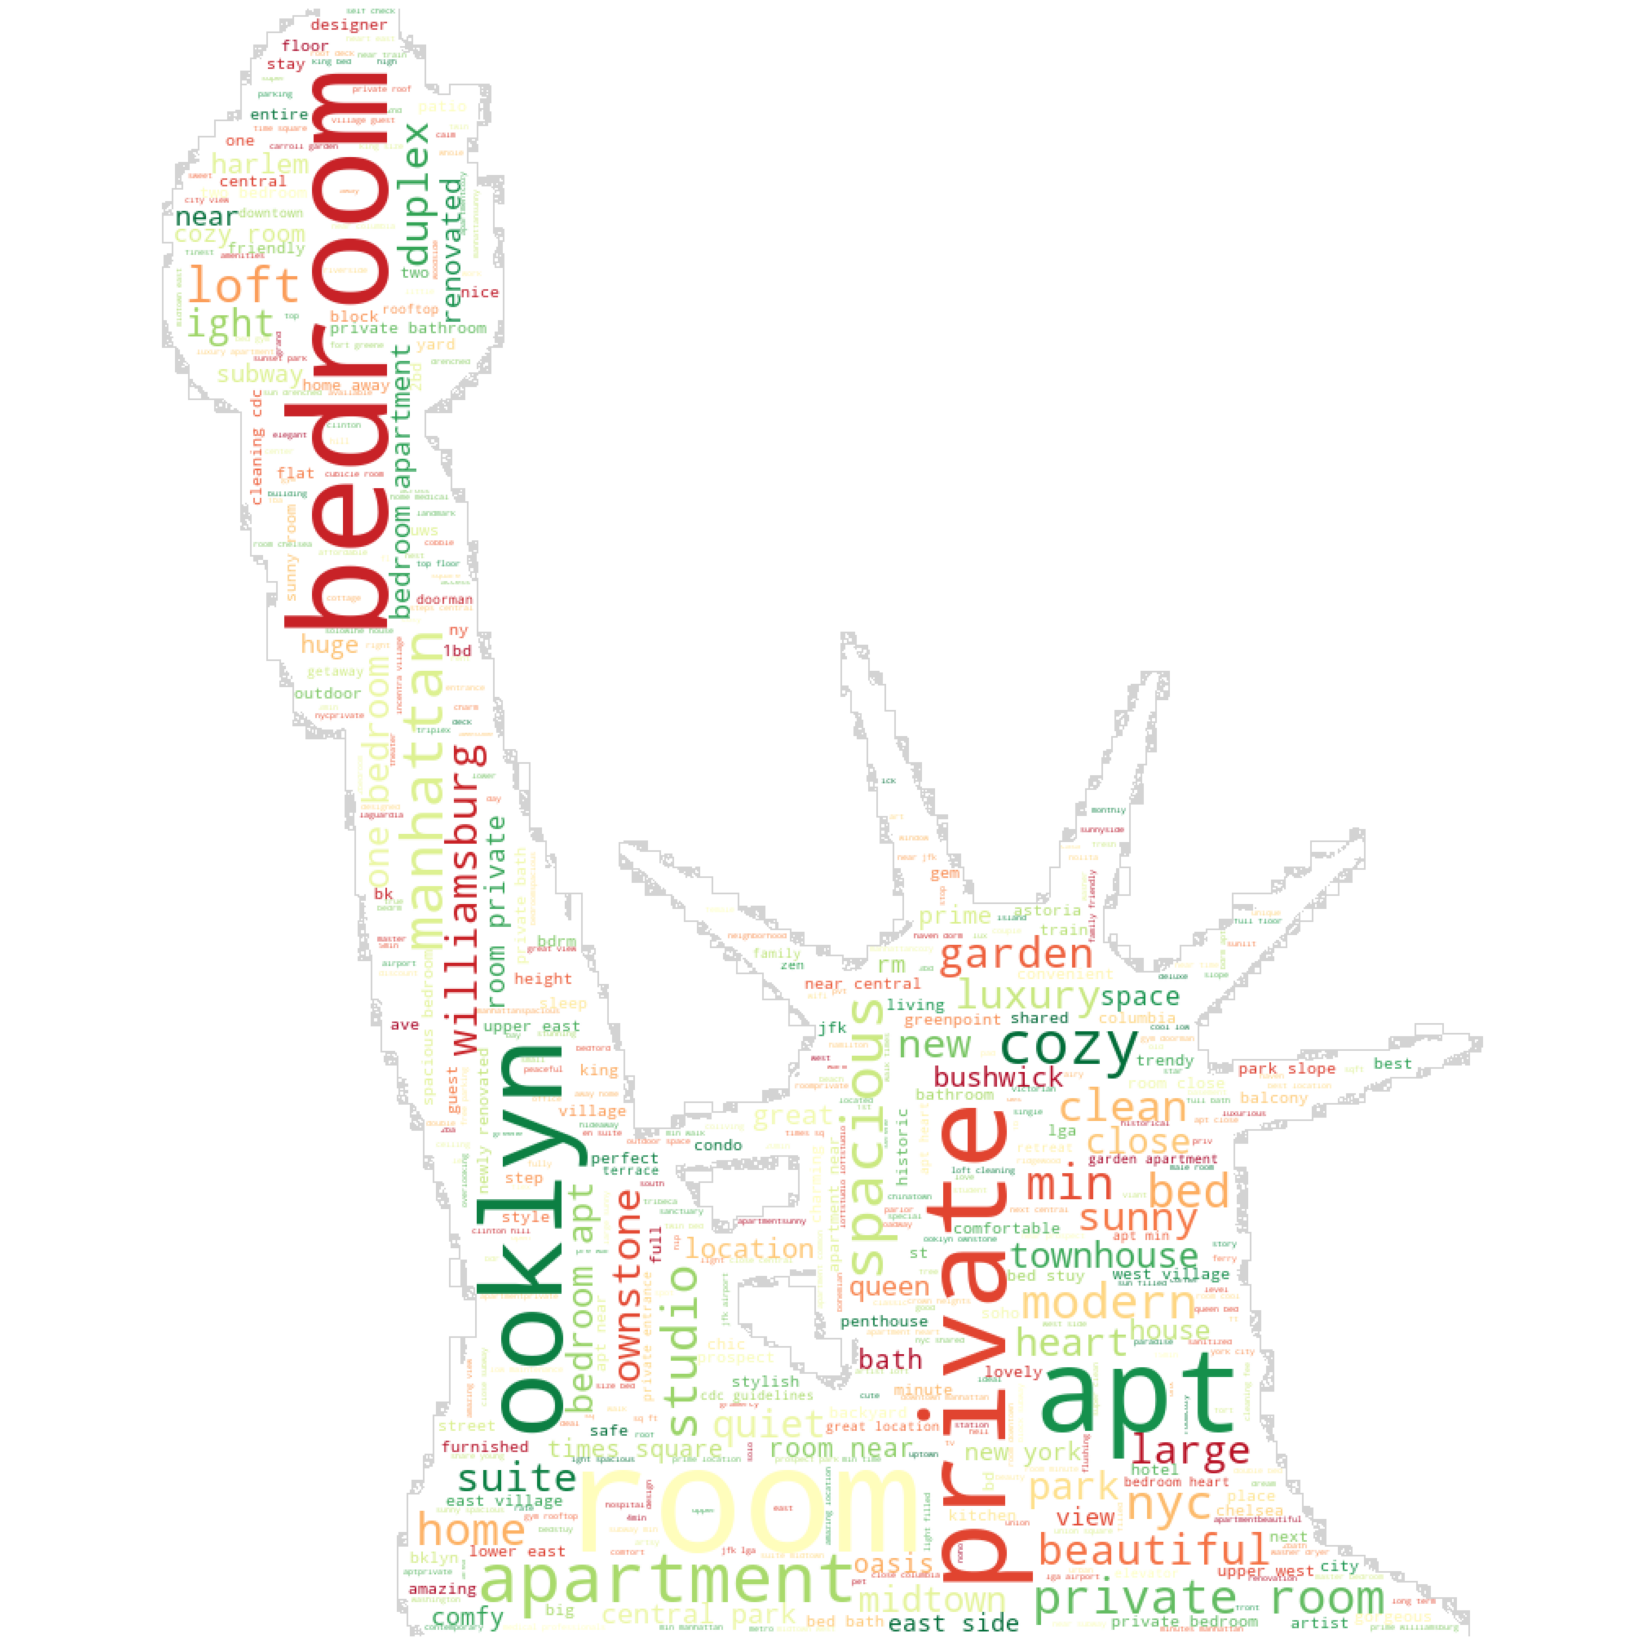

In [75]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator, get_single_color_func
from PIL import Image
comment_words = ' '
STOPWORDS.update(['/><br','br','&'])
stopwords = set(STOPWORDS)


sentences=''
for val in df1['name']: 

   # typecaste each val to string 
    val = str(val)
    sentences=val+sentences
   # split the value 
tokens=sentences.split()

# Converts each token into lowercase 
token=[element.lower() for element in tokens]

# for words in token: 
comment_words=" ".join(str(item) for item in token)
comment_words=comment_words.replace("br", "").replace('access to','access')\
.replace('you will','').replace('the apartment','apartment').replace('apartment is','apartment').replace('je suis','')
mask = np.array(Image.open("liberty_statue.jpg"))

image_colors = ImageColorGenerator(mask)

wordcloud = WordCloud(width = 800, height =900 , 
            stopwords = stopwords, 
            max_words=1000,
            background_color="white",
            colormap='RdYlGn',
            mask=mask,
            min_font_size = 5,                      
            collocations=True,
            contour_color='lightgrey',
            contour_width=1).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (50, 30)) 
plt.imshow(wordcloud) 
plt.axis("off") 
#plt.tight_layout(pad = 0) 
plt.savefig("wordcloud_name")
plt.show()

### 2. Geographic Distribution

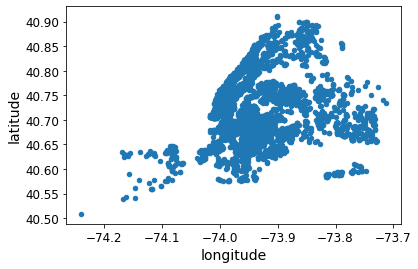

In [77]:
df1.plot(kind="scatter", x="longitude", y="latitude")
plt.savefig("bad_visualization_plot")

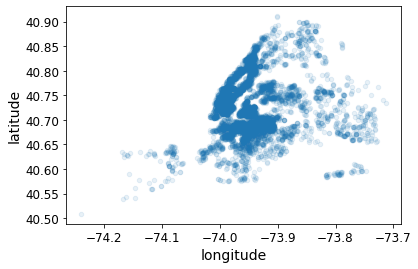

In [78]:
df1.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.savefig("better_visualization_plot")

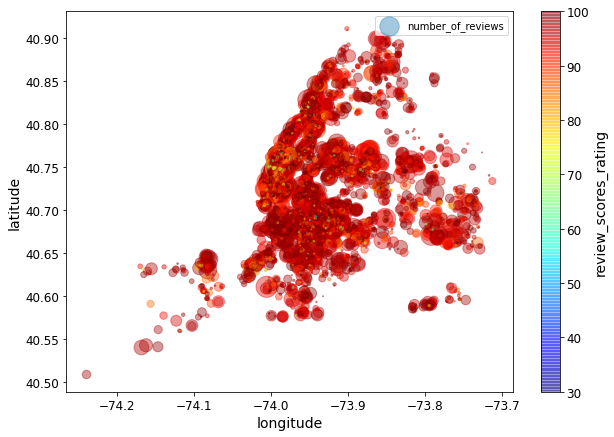

In [79]:
df1.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=df1["number_of_reviews"], label="number_of_reviews", figsize=(10,7),
    c="review_scores_rating", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
plt.savefig("Airbnb_review_rating_scatterplot")

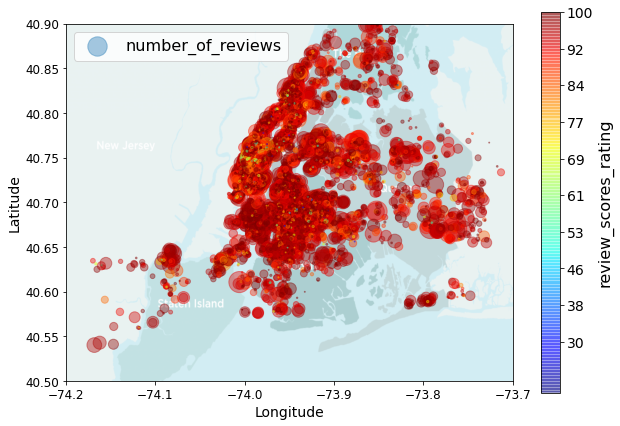

In [83]:
import matplotlib.image as mpimg
california_img=mpimg.imread('map_nyc.png')
ax = df1.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=df1["number_of_reviews"], label="number_of_reviews",
                       c="review_scores_rating", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-74.2, -73.7, 40.5, 40.90], alpha=0.4,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

rating = df1["review_scores_rating"]
tick_values = np.linspace(rating.min(), rating.max(), 10)
cbar = plt.colorbar(ticks=tick_values/rating.max())
cbar.ax.set_yticklabels([(round(v)) for v in tick_values], fontsize=14)
cbar.set_label('review_scores_rating', fontsize=16)

plt.legend(fontsize=16)
plt.savefig("Montreal_Airbnb_review_rating_scatterplot")
plt.show()

### 3. Get the correlation value between target variable ("review_scores_rating") and other predictors

In [87]:
corr_matrix2 = df1.corr()

In [88]:
corr_matrix2["review_scores_rating"].sort_values(ascending=False)

review_scores_rating         1.000000
host_is_superhost            0.278963
amenities_length             0.167810
host_since_days              0.111430
price_per_accommodates       0.097599
has_Hair_dryer               0.090977
host_response_rate           0.077282
verifications_length         0.068575
price                        0.064726
description_length           0.053203
number_of_reviews            0.041081
longitude                    0.036754
name_length                  0.031783
reviews_per_month            0.029780
bedrooms                     0.018988
first_reviews_days           0.012917
beds                        -0.002879
number_of_reviews_l30d      -0.008087
accommodates                -0.010573
host_identity_verified      -0.016329
host_about_length           -0.017769
minimum_nights              -0.031950
host_total_listings_count   -0.036696
latitude                    -0.041689
host_acceptance_rate        -0.043134
maximum_nights              -0.068417
last_review_

In [89]:
corr_matrix["review_scores_rating"].sort_values(ascending=False)

review_scores_rating         1.000000
number_of_reviews            0.054595
reviews_per_month            0.041548
bedrooms                     0.010334
number_of_reviews_l30d       0.005152
accommodates                -0.006905
beds                        -0.011301
maximum_nights              -0.013451
longitude                   -0.015705
minimum_nights              -0.025785
latitude                    -0.031618
host_total_listings_count   -0.032321
Name: review_scores_rating, dtype: float64

### Compare the correlation value before and after adding new features, we can see that the new feature of "amenities_length","price_per_accommodates" and "has_hair_dryer" are all the predictors have the high correlation with the target variable

### 4. Draw the scatter matrix plot for the top 4 correlated varibles with review_scores_rating

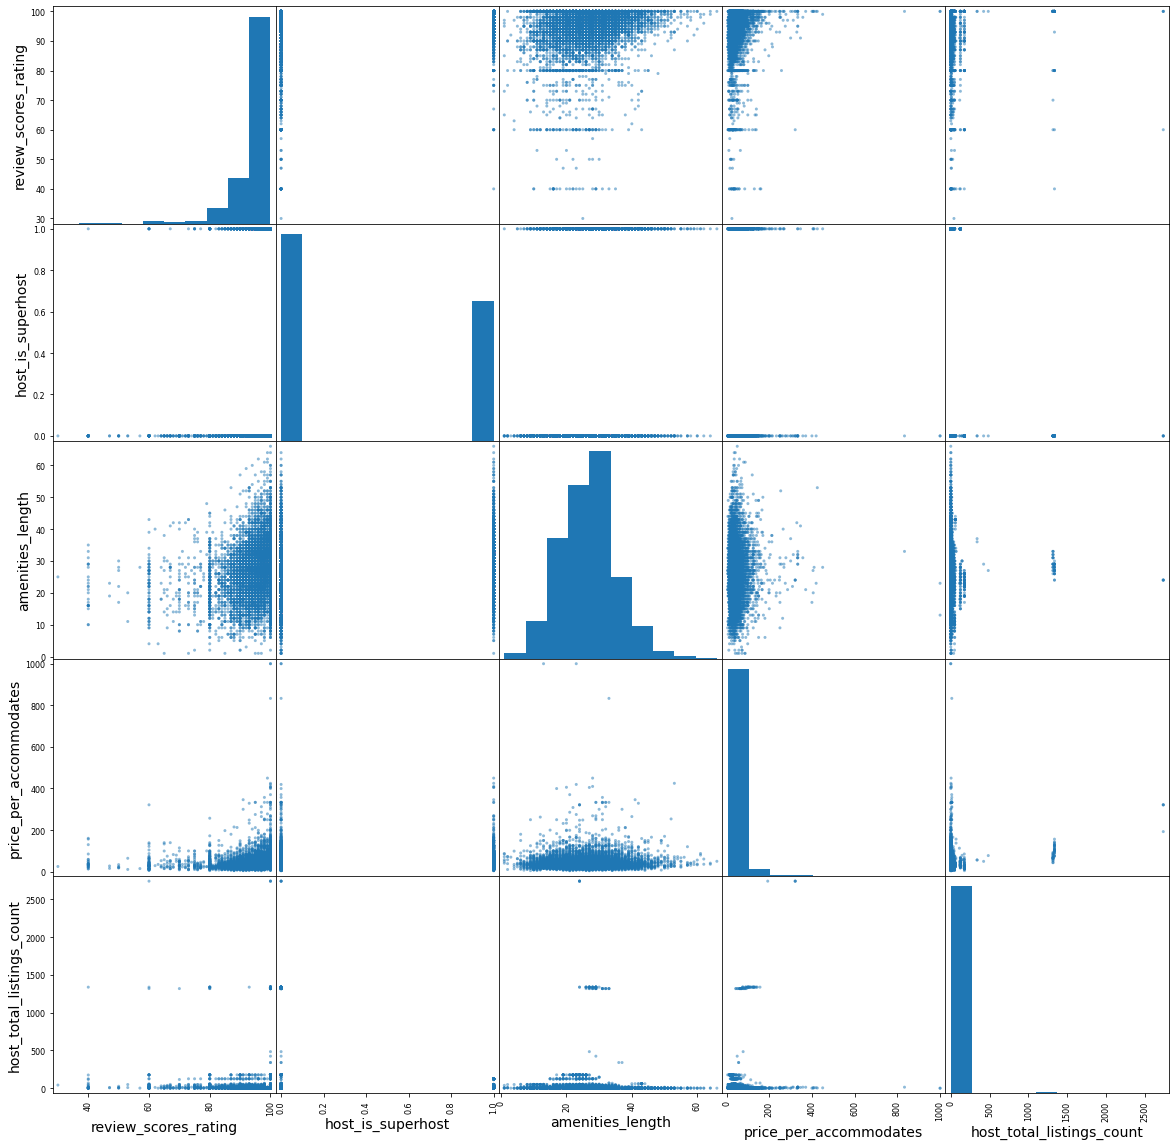

In [92]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["review_scores_rating", "host_is_superhost", "amenities_length",
              "price_per_accommodates",'host_total_listings_count']
scatter_matrix(df1[attributes], figsize=(20, 20))
plt.savefig("scatter_matrix_plot")

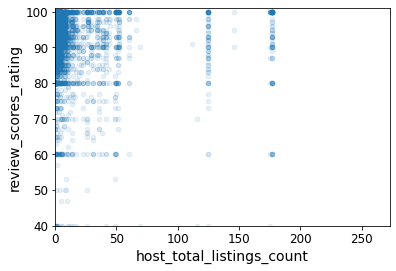

In [93]:
df1.plot(kind="scatter", x="host_total_listings_count", y="review_scores_rating",
             alpha=0.1)
plt.axis([0, 273, 40, 101])
plt.savefig("listing_counts_vs_rating_scatterplot")

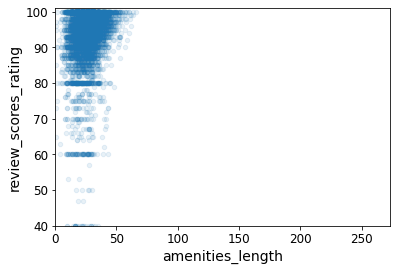

In [94]:
df1.plot(kind="scatter", x="amenities_length", y="review_scores_rating",
             alpha=0.1)
plt.axis([0, 273, 40, 101])
plt.savefig("income_vs_house_value_scatterplot")

In [95]:
df1.describe()

host_response_rate  ...  has_Hair_dryer
count         7831.000000  ...     7831.000000
mean             0.918087  ...        0.807432
std              0.204328  ...        0.394342
min              0.000000  ...        0.000000
25%              0.960000  ...        1.000000
50%              1.000000  ...        1.000000
75%              1.000000  ...        1.000000
max              1.000000  ...        1.000000

[8 rows x 28 columns]